In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats

plt.style.use(['fivethirtyeight'])

qualitative_colors = sns.color_palette("Set3", 10)
matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('../2. Big Data 분석/titanic.csv', encoding = 'cp949')

- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

# 2. 데이터 특성 확인하기

- 데이터 속성 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

- 기술통계량 확인

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 결측치 확인

In [6]:
## cabin에 결측치가 너무 많아서 최빈값으로 대체하면 안될 것 같긴합니다..
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 이상치 확인하기

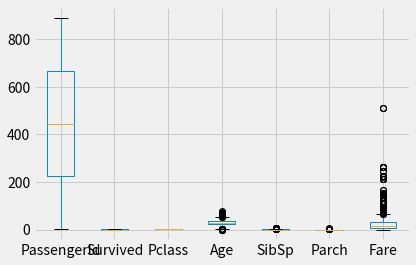

In [7]:
df.boxplot()
plt.show()

# 3. 데이터 전처리

- 결측치 대체

In [8]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].value_counts().index[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 파생변수 생성
#### 1. 객실번호 첫자리

In [10]:
df['Cabin_first'] = df.Cabin.str.get(i=0)

#### 2. 나이 파생 변수

In [11]:
def make_age_group(x):
    if x > 58:
        return 'Old'
    elif x > 45:
        return 'Prime'
    elif x > 28:
        return 'Middle'
    elif x > 14:
        return 'Young'
    else:
        return 'Child'

In [12]:
df['age_group'] = df.Age.apply(make_age_group)

#### 3. 가족수 계산

In [13]:
df['Family'] = df.SibSp + df.Parch

#### 4. 요금 구간화

In [14]:
def make_binning_fee(x):
    if x > 200:
        return 4
    elif x > 150:
        return 3
    elif x > 100:
        return 2
    elif x > 50:
        return 1
    else:
        return 0

In [15]:
df['binning_fee'] = df.Fare.apply(make_binning_fee)

# 4. 그래프 분석

- 목표변수(survived)의 빈도수 현황 확인 (막대그래프)

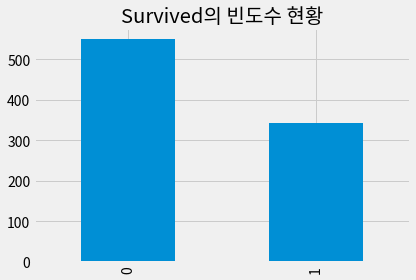

In [16]:
df.Survived.value_counts().plot.bar()
plt.title('Survived의 빈도수 현황')
plt.show()

- 목표변수(survived)의 비율 확인 (파이차트)

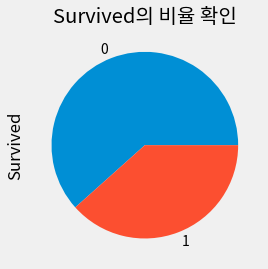

In [17]:
df.Survived.value_counts().plot.pie()
plt.title('Survived의 비율 확인')
plt.show()

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_first,age_group,Family,binning_fee
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,B,Young,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Middle,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,B,Young,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Middle,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,B,Middle,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,B,Young,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Young,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,B96 B98,S,B,Middle,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Young,0,0


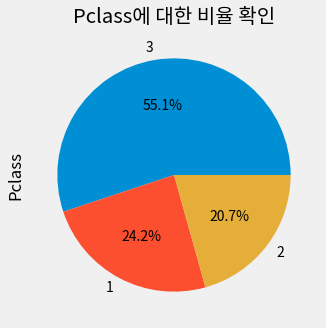

--------------------------------------------------


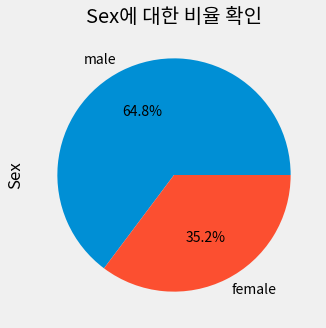

--------------------------------------------------


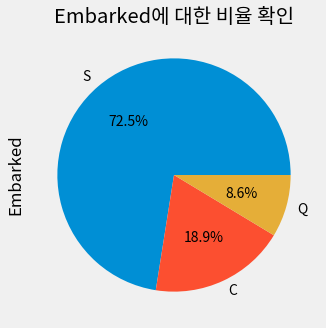

--------------------------------------------------


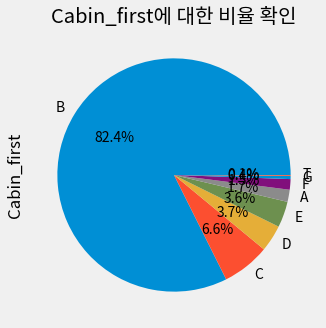

--------------------------------------------------


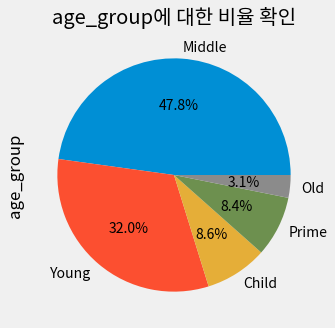

--------------------------------------------------


In [19]:
for i in ['Pclass', 'Sex', 'Embarked', 'Cabin_first', 'age_group']:
    plt.figure(figsize=(5,5))
    df[i].value_counts().plot.pie(autopct='%.1f%%')
    plt.title('{}에 대한 비율 확인'.format(i))
    plt.show()
    print('-'*50)

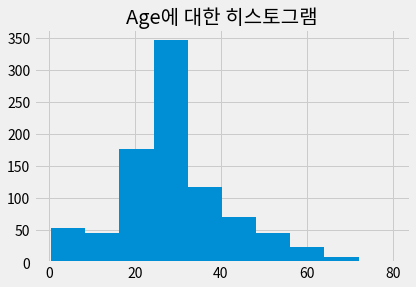

In [20]:
df['Age'].hist()
plt.title('Age에 대한 히스토그램')
plt.show()

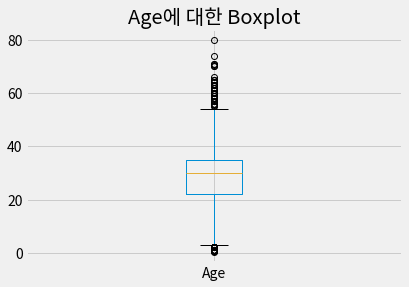

In [21]:
df[['Age']].boxplot()
plt.title('Age에 대한 Boxplot')
plt.show()

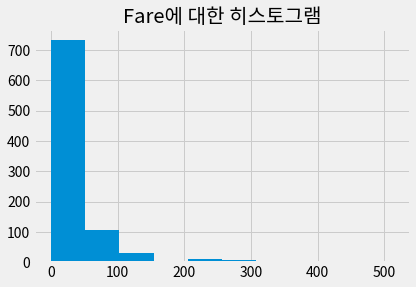

In [22]:
df[['Fare']].hist()
plt.title('Fare에 대한 히스토그램')
plt.show()

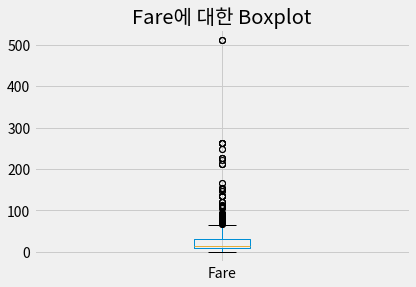

In [23]:
df[['Fare']].boxplot()
plt.title('Fare에 대한 Boxplot')
plt.show()

# * 좌석별 생존자 사망자 특성

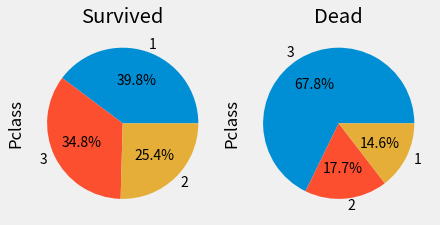

In [24]:
plt.subplots(constrained_layout=True)
plt.subplot(121)
df[df['Survived'] == 1]['Pclass'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Survived')

plt.subplot(122)
df[df['Survived'] == 0]['Pclass'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Dead')

plt.show()

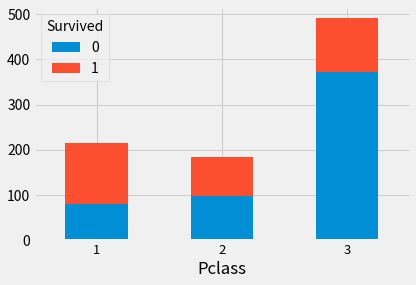

In [25]:
stacked_bar_df = df.groupby(["Pclass","Survived"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.show()

- 좌석별로 사망자와 생존자를 비교해보면 생존자중에는 1등급 좌석을 보유한 사람들이 가장 많았다. 1등급 좌석을 가진 사람들을 많이 생존했지만 이와 반대로 사망자 중에는 3등급 좌석을 보유한 사람의 비율이 압도적으로 높은 것을 볼 수 있다. 좌석의 가치가 낮아질수록 해당 티켓의 사망자의 비율이 점점 높아지는 것을 알 수 있다.

# * Gender별 생존자 사망자 특성

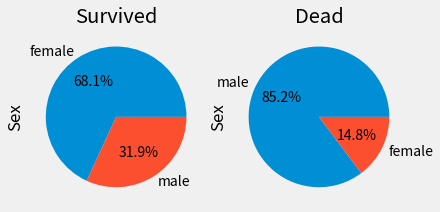

In [26]:
plt.subplots(constrained_layout=True)
plt.subplot(121)
df[df['Survived'] == 1]['Sex'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Survived')

plt.subplot(122)
df[df['Survived'] == 0]['Sex'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Dead')

plt.show()

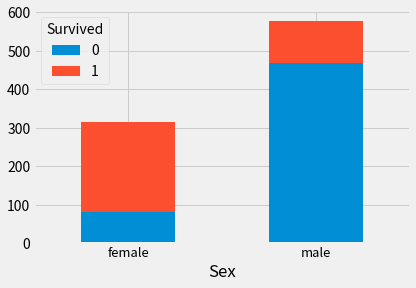

In [27]:
stacked_bar_df = df.groupby(["Sex","Survived"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.show()

- 성별로 사망자와 생존자를 비교하여 보면 생존자에는 여성의 비율이 높고 사망자 중에는 남성의 비율이 압도적으로 높은 것을 볼 수 있다.

# * 연령대별 생존자 사망자 특성

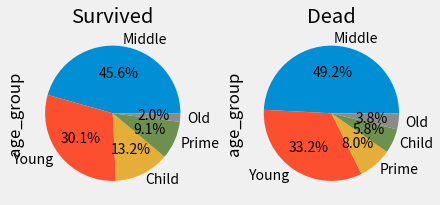

In [28]:
plt.subplots(constrained_layout=True)
plt.subplot(121)
df[df['Survived'] == 1]['age_group'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Survived')

plt.subplot(122)
df[df['Survived'] == 0]['age_group'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Dead')

plt.show()

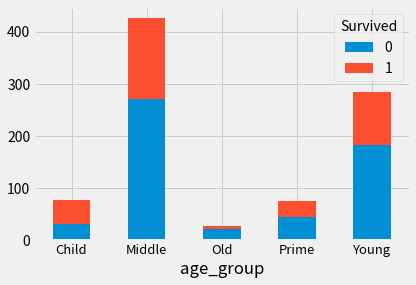

In [29]:
stacked_bar_df = df.groupby(["age_group","Survived"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True)
plt.xticks(rotation=0, fontsize=13)
plt.show()

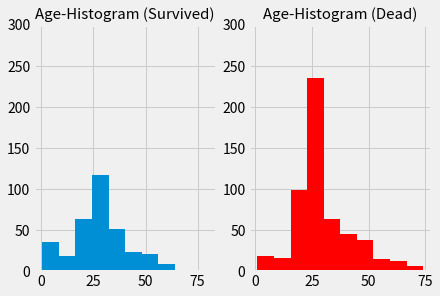

In [30]:
plt.subplots(constrained_layout=True)
plt.subplot(121)
df[df['Survived'] == 1]['Age'].hist(bins=10)
plt.ylim(0,300)
plt.title("Age-Histogram (Survived)", fontsize=15)

plt.subplot(122)
df[df['Survived'] == 0]['Age'].hist(bins=10,color='RED')
plt.ylim(0,300)
plt.title("Age-Histogram (Dead)", fontsize=15)
plt.show()

- 어린 탑승자들의 생존 비율은 높은 편이지만 고령층인 old그룹은 거의 생존을 하지 못한 것을 볼 수 있다.

# * 요금별 생존자 사망자 특성

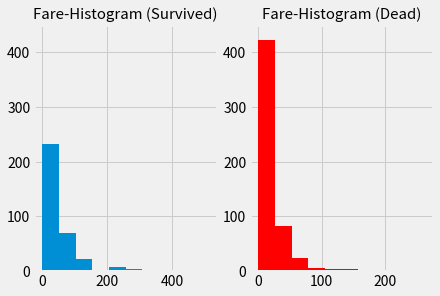

In [31]:
plt.subplots(constrained_layout=True)
plt.subplot(121)
df[df['Survived'] == 1]['Fare'].hist(bins=10)
plt.ylim(0,450)
plt.title("Fare-Histogram (Survived)", fontsize=15)

plt.subplot(122)
df[df['Survived'] == 0]['Fare'].hist(bins=10,color='RED')
plt.ylim(0,450)
plt.title("Fare-Histogram (Dead)", fontsize=15)
plt.show()

- 요금을 적게 낸 사람들 사이에서의 사망 비율이 확연히 높은데 이는 좌석과 연관이 있는 것으로 보인다. 

# 결론

: 성별, 연령대와 재력이 생존과 사망을 구분짓는 것에 큰 영향을 끼치는 것으로 보인다. 남성보다 여성이 더 많이 생존하였으며 고령의 탑승객들보다 어린 연령층의 탑승객들이 더 많이 생존한 것을 볼 수 있다. 또한 좌석과 요금에서도 1등급 좌석을 보유한 사람들이 높은 비율로 생존하였으며 운임요금을 적게 내거나 3등급 좌석을 보유한 사람들의 사망률이 매우 높은 것을 알 수 있다.

## 실습과제

### 210 page

In [32]:
ds_mycars = pd.read_csv('../1. Big_Data_분석기초/mycars.csv'); ds_mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [33]:
## 시내 연비 통계치
ds_mycars.groupby('driving')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
driving,,,,,,,,
4,103.0,14.330097,2.874459,9.0,13.0,14.0,16.0,21.0
f,106.0,19.971698,3.626510,11.0,18.0,19.0,21.0,35.0
r,25.0,14.080000,2.215852,11.0,12.0,15.0,15.0,18.0


In [34]:
## 고속도로 연비 통계치
ds_mycars.groupby('driving')['highway_mileage'].describe()

,count,mean,std,min,25%,50%,75%,max
driving,,,,,,,,
4,103.0,19.174757,4.078704,12.0,17.0,18.0,22.0,28.0
f,106.0,28.160377,4.206881,17.0,26.0,28.0,29.0,44.0
r,25.0,21.000000,3.662877,15.0,17.0,21.0,24.0,26.0


### 213 page

In [35]:
## 구동방식
count = ds_mycars['driving'].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count' : count, 'CumCnt' : cumcnt, 'Percent' :percent,
                          'CumPct' : cumpct})
count_data.columns.name = 'driving'
count_data

driving,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [36]:
## 모델
count = ds_mycars['model'].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count' : count, 'CumCnt' : cumcnt, 'Percent' :percent,
                          'CumPct' : cumpct})
count_data.columns.name = 'model'
count_data

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


In [37]:
## 구동방식 + 모델
count = ds_mycars[['model','driving']].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count' : count, 'CumCnt' : cumcnt, 'Percent' :percent,
                          'CumPct' : cumpct})
count_data

,,Count,CumCnt,Percent,CumPct
model,driving,,,,
4runner 4wd,4,6,6,2.564103,2.564103
a4,f,7,13,2.991453,5.555556
a4 quattro,4,8,21,3.418803,8.974359
a6 quattro,4,3,24,1.282051,10.256410
altima,f,6,30,2.564103,12.820513
c1500 suburban 2wd,r,5,35,2.136752,14.957265
camry,f,7,42,2.991453,17.948718
camry solara,f,7,49,2.991453,20.940171
caravan 2wd,f,11,60,4.700855,25.641026


### 226 page

In [38]:
mu = 175
sigma = 5
x1 = 180

prob1 = stats.norm.cdf(x1, mu,sigma)

In [39]:
print(round((prob1)*100,2), '%', ', 즉 상위{}%에 위치함'.format(round((1-prob1)*100,2),), )


84.13 % , 즉 상위15.87%에 위치함


### 228 page   
- 1)

In [40]:
mu = 12
sigma = 3
x1 = 15

prob1 = stats.norm.cdf(x1, mu,sigma)

prob2 = stats.norm.cdf(x1, mu,sigma)



print('{0}km 이상 달릴 확률은 {1:.3f}에 해당함'.format(x1, (1 -prob1)))

15km 이상 달릴 확률은 0.159에 해당함


### 228 page   
- 2)

In [41]:
mu = 12
sigma = 3
x1 = 9

prob1 = stats.norm.cdf(x1, mu,sigma)


mu = 12
sigma = 3
x2 = 15

prob2 = stats.norm.cdf(x2, mu,sigma)

print(str(round(prob2 - prob1,2)*100) + '% 입니다')

68.0% 입니다


### 236 page

In [42]:
t = 2
dof = 100
prob = stats.t.cdf(t,dof)

print("P(T<=t): {:.3f}".format(prob))

P(T<=t): 0.976


### 239 page

In [43]:
chisq = 3.0
dof = 8

prob = stats.chi2.cdf(chisq,dof)
print("P(X<={0}) : {1:.4f}".format(chisq, prob))

P(X<=3.0) : 0.0656


### 243 page

In [44]:
f = 1.5
dfnum = 10
dfden = 100
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)

print("P(X <= F): {:.3f}".format(prob))

P(X <= F): 0.850


### 250 page

In [45]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002
